In [1]:
import cmath
import matplotlib.pyplot as plt
import numpy as np

In [120]:
freq = np.linspace(25e9, 200e9, 100)
index = np.where(np.round(freq/1e9)==78)

In [52]:
er = 24
o = 0.02
e0 = 8.85e-12
u0 = 4*np.pi*10e-7
K = 1
ur = 1
s=0.03
d=0.004
l=0.29
f=1
psi = 1

In [132]:
C = er*e0*np.pi/(s/d)
G = o*np.pi/(s/d)
L = u0*ur/(np.pi*(s/d))
R = 1.66*K*np.sqrt(f)*10e-7/d


In [180]:
def reset():
    global C, G, R, L, dC, dR, dL, dG
    C = er*e0*np.pi/(s/d)
    G = o*np.pi/(s/d)
    L = u0*ur/(np.pi*(s/d))
    R = 1.66*K*np.sqrt(f)*10e-7/d
    dC = 0.1
    dR = 5
    dL = 0.2
    dG = 0.5

In [181]:
def z(C, G, R, L):
    gamma = np.sqrt(np.vectorize(complex)(R, freq*L)*np.vectorize(complex)(G, freq*C))
    z0 = np.sqrt(np.vectorize(complex)(R, freq*L)/np.vectorize(complex)(G, freq*C))
    zl = 1/(np.vectorize(complex)(psi*o, 2*np.pi*f*e0*er))
    return z0*(zl*np.cosh(gamma*l)+z0*np.sinh(gamma*l))/(zl*np.sinh(gamma*l)+z0*np.cosh(gamma*l))

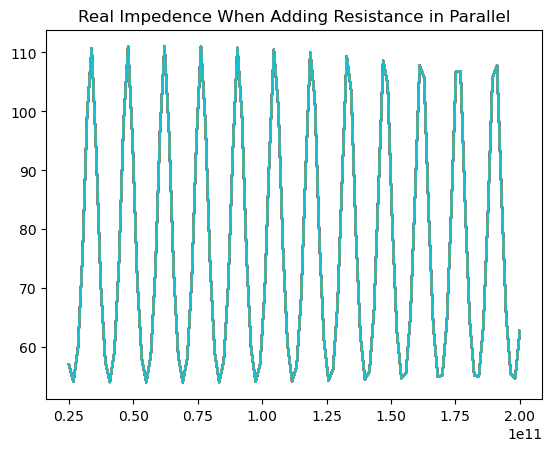

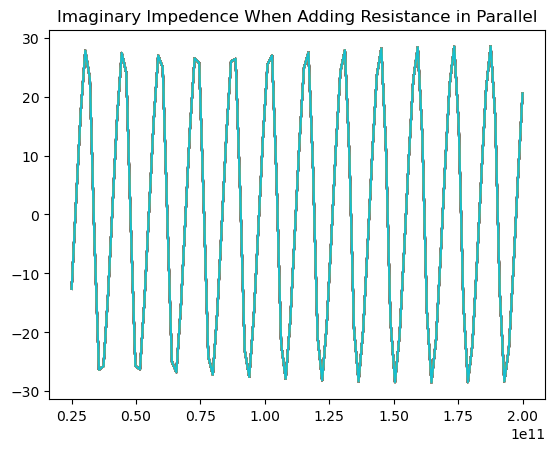

0.0004149982777571472


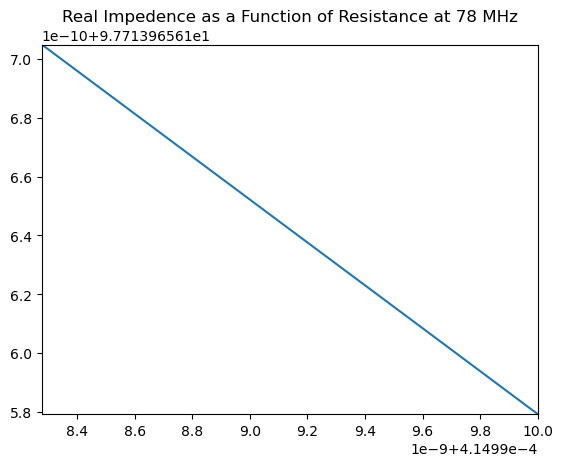

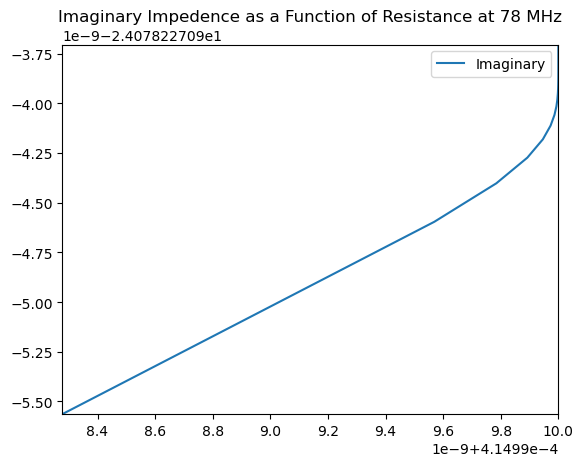

In [198]:
dC = 0.1
dR = 50
dL = 0.2
dG = 0.5

def plots(which_var="R"):
    if which_var="R":
        ch = R
        dch = dR
        
    if which_var="C":
        ch = C
        dch = dC
        
    if which_var="L":
        ch = L
        dch = dL
        
    if which_var="G ":
        ch = G
        dch = dG
        
    imp78 = []
    im78 = []
    r = []
    #plt.plot(freq, z(C, G, R, L))

    for i in range(50):
        dR += dR 
        impedence = z(C, G, 1/(1/R + 1/dR), L)
        plt.plot(freq, impedence.real, label=f"R = {round(R+dR, 1)}")
        imp78.append(impedence.real[index])
        r.append(1/(1/R + 1/dR))

    plt.title("Real Impedence When Adding Resistance in Parallel")
    plt.show()
    reset()

    # plt.legend()

    for i in range(50):
        dR+=5
        impedence = z(C, G, 1/(1/R + 1/dR), L)
        plt.plot(freq, impedence.imag, label=f"R = {round(R+dR, 1)}")
        im78.append(impedence.imag[index])

    plt.title("Imaginary Impedence When Adding Resistance in Parallel")
    plt.show()

    plt.plot(r, imp78, label="Real")
    plt.title("Real Impedence as a Function of Resistance at 78 MHz")
    plt.xlim(min(r), max(r))
    plt.ylim(min(imp78), max(imp78))
    print(min(r))
    plt.show()
    plt.plot(r, im78, label="Imaginary")
    plt.xlim(min(r), max(r))
    plt.ylim(min(im78), max(im78))
    # plt.yscale('log')
    plt.title("Imaginary Impedence as a Function of Resistance at 78 MHz")
    plt.legend()
    plt.show()
    reset()



(50, 100) (50, 100)
0.00041499999999999995
0.00041499999999999995
(50, 70)


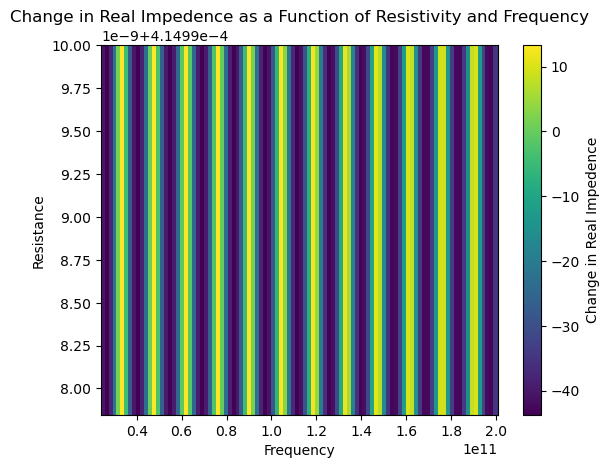

In [206]:
imp = np.array([z(C, G, r[i], L) for i in range(len(r))])
xx, yy = np.meshgrid(freq, r)
print(xx.shape, imp.shape)
plt.title("Change in Real Impedence as a Function of Resistivity and Frequency")
plt.pcolor(xx, yy, imp.real - z(C, G, r[0], L)[index].real)
plt.xlabel("Frequency")
plt.ylabel("Resistance")
cbar = plt.colorbar()
cbar.set_label("Change in Real Impedence")
print(max(r))
print(R)
print(imp[:,30:].shape)
plt.show()


Text(0.5, 1.0, 'Changing Capacitance')

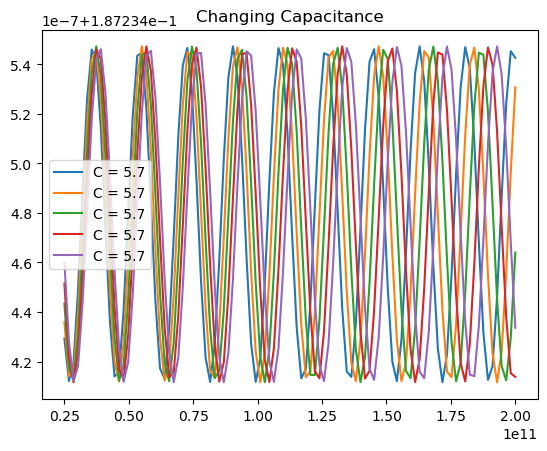

In [101]:
for i in range(5):
    dC += 0.0000000001
    plt.plot(freq, z(C+dC, G+dG, R+dR, L+dL), label=f"C = {round(C+dC, 1)}")

#plt.plot(freq, z(0, 0, 0, 0), label="r")
plt.legend()
plt.title("Changing Capacitance")

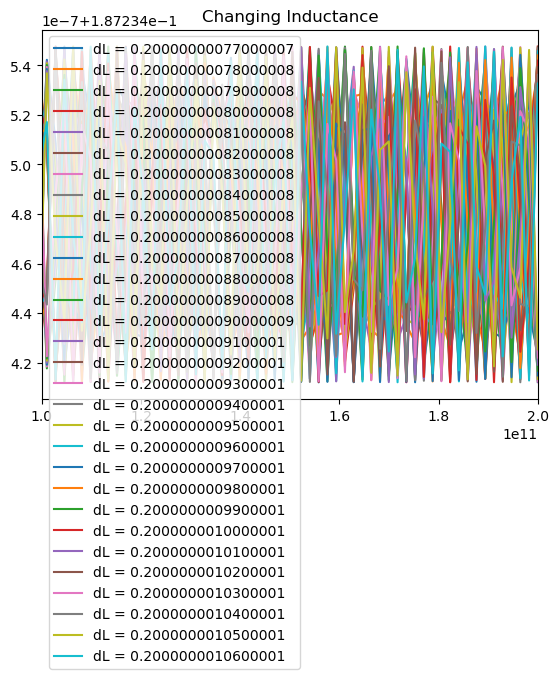

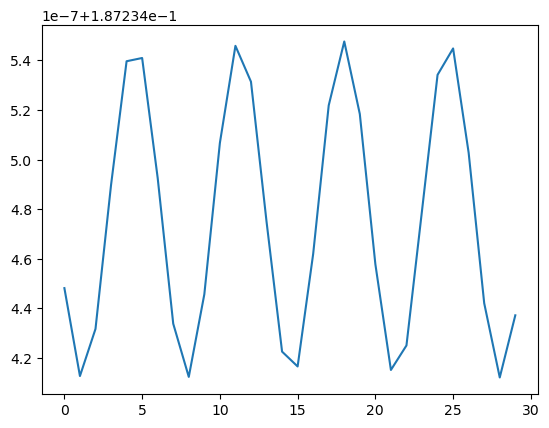

In [111]:
freqnew = []
freqmax = []

for i in range(30):
    dL += 0.00000000001
    plt.plot(freq, z(C+dC, G+dG, R+dR, L+dL), label=f"dL = {dL}")
    freqnew.append(freq[20])
    freqmax.append(z(C+dC, G+dG, R+dR, L+dL)[20])

#plt.plot(freq, z(0, 0, 0, 0), label="r")
plt.legend()
plt.xlim(100e9, 200e9)
plt.title("Changing Inductance")
plt.show()
plt.plot(range(len(freqmax)), freqmax)